<a href="https://colab.research.google.com/github/Oussoubicodes/CS4287-Assignment-1/blob/main/CS4287_Prj1_20242905_20250762.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Oussoubi Niakate - 20242905

Dennis Kolomiyets - 20250762


Imports

In [ ]:
from IPython.core.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import csv


Visualising the Data

In [ ]:

#Fetch data through pandas
houses = pd.read_csv("Housing.csv")

#Displaying the first few rows of the data
display(houses.head())

#Dataset statistics
houses.describe()


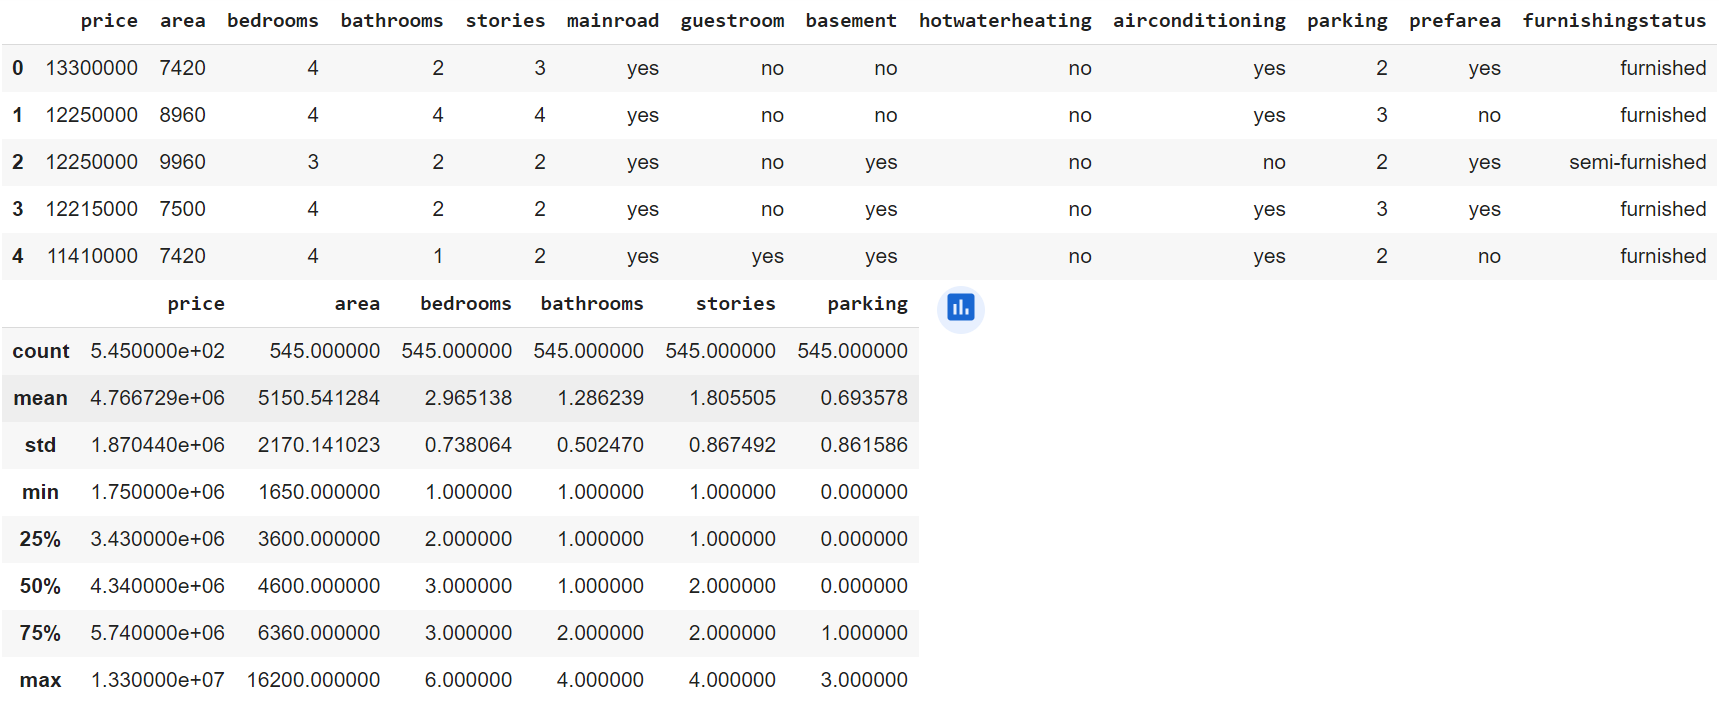

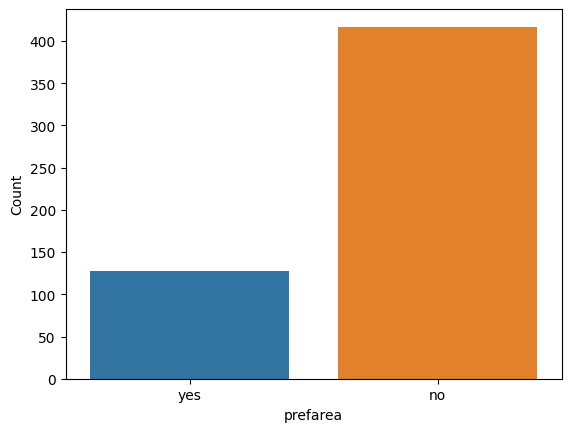

In [57]:
#Showing the difference between houses located in a preferred area and not
sbn.countplot(data=houses, x='prefarea')
plt.ylabel('Count')
plt.show()


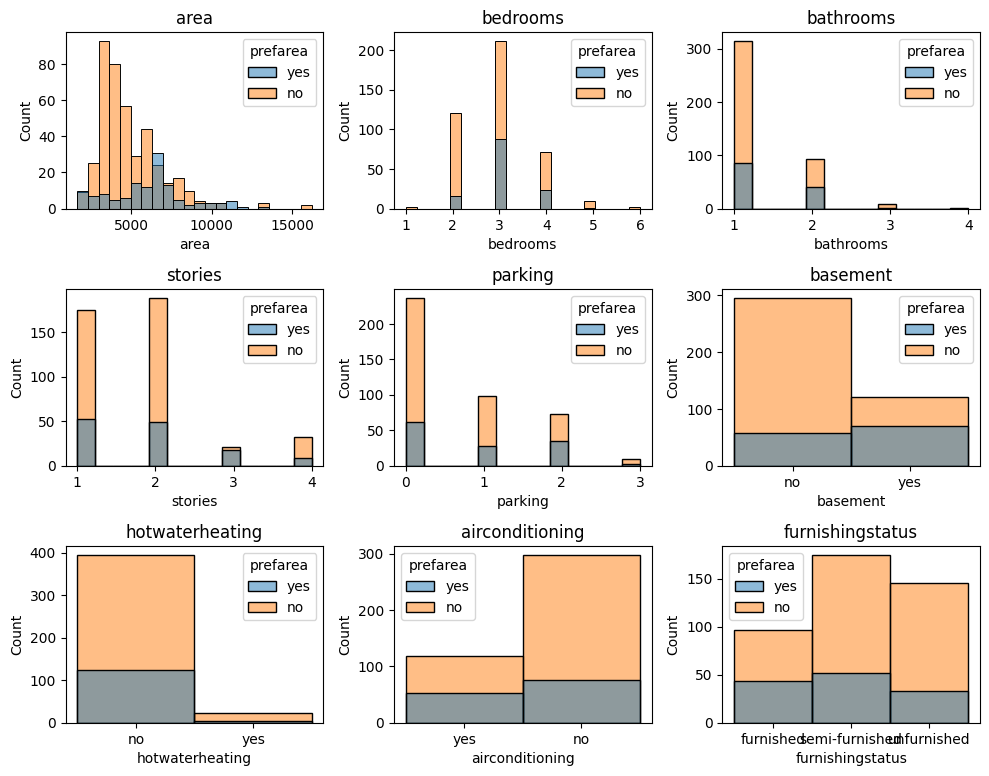

In [56]:
attri=['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'basement',
       'hotwaterheating', 'airconditioning', 'furnishingstatus']
fig = plt.figure(figsize=(10,10))

for i in range(len(attri)):
    plt.subplot(4,3,i+1)
    plt.title(attri[i])
    sbn.histplot(data=houses,x=houses[attri[i]],hue='prefarea')
plt.tight_layout()
plt.show()